<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/Tarea9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7.1¿Qué es una Máquina de Turing?

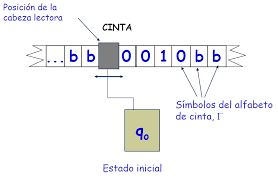

Una Máquina de Turing es un modelo computacional abstracto propuesto por Alan Turing en 1936 para formalizar el concepto de algoritmo y computabilidad. Conceptualmente consiste en una cinta infinita dividida en celdas (memoria) y un cabezal lector/escritor que se mueve a lo largo de la cinta, leyendo y escribiendo símbolos según un conjunto finito de reglas (estados y transiciones).
Aunque es muy simple, este modelo puede simular cualquier algoritmo computable, sirviendo como la base teórica de la computación moderna y definiendo qué problemas pueden (o no) resolverse mediante un algoritmo.

¿Qué es el “paradigma de Turing” en los lenguajes de programación?

El paradigma de Turing se refiere al hecho de que la mayoría de los lenguajes de programación imperativos siguen el modelo de cómputo de la Máquina de Turing (o de la arquitectura de Von Neumann).

En la práctica esto significa que los programas manipulan un estado implícito (variables en memoria) mediante secuencias de instrucciones de lectura/escritura, equivalente a los pasos de una Máquina de Turing. Por ejemplo, la mayoría de los lenguajes (C, Python, Java, etc.) son Turing-completos: pueden simular una máquina de Turing universal, de modo que pueden ejecutar cualquier cálculo computable (dentro de límites de tiempo/memoria)

Así el paradigma de Turing asume un flujo de control secuencial que modifica un estado de memoria, según el modelo de computación clásico de Turing.

Enfoque simbólico vs enfoque conexionista

En IA simbólica (o tradicional) el conocimiento se representa explícitamente con símbolos y reglas lógicas. Por ejemplo, un sistema experto maneja reglas del tipo “SI... ENTONCES...” para razonar y resolver problemas específicos. Este enfoque es determinista y transparente (explicable), pero sufre porque no aprende automáticamente; cualquier nuevo conocimiento debe codificarse manualmente en sus reglas

Por el contrario, el enfoque conexionista se inspira en el cerebro humano: utiliza redes neuronales que aprenden patrones a partir de datos. En lugar de reglas fijas, el sistema conexionista ajusta sus parámetros internos mediante algoritmos de entrenamiento estadístico.

# Datos de cáncer de mama de Scikit-learn.

Carga del conjunto de datos y división en entrenamiento/prueba

Primero importamos el dataset de cáncer de mama, que contiene datos de diagnóstico con 30 características. Luego lo dividimos aleatoriamente en conjuntos de entrenamiento (80%) y prueba (20%). Se fija random_state=42 .

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Carga de datos
X, y = load_breast_cancer(return_X_y=True)
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Tamaño entrenamiento:", X_train.shape, "Tamaño prueba:", X_test.shape)


Tamaño entrenamiento: (455, 30) Tamaño prueba: (114, 30)


# Entrenamiento del MLP base

Entrenamos un MLPClassifier con dos capas ocultas de 10 neuronas cada una, función de activación tanh y hasta hasta convergencia. Luego calculamos la precisión (accuracy) sobre el conjunto de prueba.

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Definición del modelo MLP base
mlp = MLPClassifier(hidden_layer_sizes=(10,10), activation='tanh',
                    max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predicción y precisión
y_pred = mlp.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Precisión MLP (tanh, sin normalizar): {acc:.4f}")


Precisión MLP (tanh, sin normalizar): 0.9298


**Normalización de características**

Aplicamos StandardScaler para normalizar las características (media 0, varianza 1) y volvemos a entrenar el MLP con la misma configuración. Comparamos la precisión.

In [3]:
from sklearn.preprocessing import StandardScaler

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# MLP entrenado con datos normalizados
mlp_scaled = MLPClassifier(hidden_layer_sizes=(10,10), activation='tanh',
                           max_iter=1000, random_state=42)
mlp_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = mlp_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Precisión MLP (tanh, normalizado): {acc_scaled:.4f}")


Precisión MLP (tanh, normalizado): 0.9561


Como se observa, la precisión mejora notablemente tras la normalización de características (pues el entrenamiento converge mejor).

# Experimento a: Red más ancha

Aumentamos el número de neuronas por capa para hacer la red más ancha. Por ejemplo usamos dos capas ocultas de 50 neuronas cada una, manteniendo tanh y 1000 iteraciones.

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

configs_wide = [
    (20, 20),
    (50, 50),
    (100, 100),
    (200, 200),
    (300, 300),
]

results_wide = {}

for cfg in configs_wide:
    mlp = MLPClassifier(hidden_layer_sizes=cfg, activation='tanh',
                        max_iter=1000, random_state=42)
    mlp.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, mlp.predict(X_test_scaled))
    results_wide[cfg] = acc

print("Resultados: redes más anchas (activación = tanh)")
for cfg, acc in results_wide.items():
    print(f"{cfg}: {acc:.4f}")


Resultados: redes más anchas (activación = tanh)
(20, 20): 0.9561
(50, 50): 0.9737
(100, 100): 0.9561
(200, 200): 0.9825
(300, 300): 0.9649


Al aumentar el número de neuronas por capa, la red puede representar funciones más complejas. Sin embargo, redes demasiado grandes pueden sobreajustar los datos y reducir la precisión en el conjunto de prueba como se vio en 20,100 y 300 neuronas, aunque con 200 funcionó muy bien.

# Experimento b: Red más profunda

Aumentamos el número de capas ocultas, usando tres capas de 10 neuronas cada una (en vez de dos).

In [10]:
configs_deep = [
    (10,),
    (10,10),
    (10,10,10),
    (10,10,10,10),
    (10,10,10,10,10),
    (20,20,20,20,20)
]

results_deep = {}

for cfg in configs_deep:
    mlp = MLPClassifier(hidden_layer_sizes=cfg, activation='tanh',
                        max_iter=2000, random_state=42)
    mlp.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, mlp.predict(X_test_scaled))
    results_deep[cfg] = acc

print("Resultados: redes más profundas (activación = tanh)")
for cfg, acc in results_deep.items():
    print(f"{cfg}: {acc:.4f}")


Resultados: redes más profundas (activación = tanh)
(10,): 0.9649
(10, 10): 0.9561
(10, 10, 10): 0.9561
(10, 10, 10, 10): 0.9649
(10, 10, 10, 10, 10): 0.9561
(20, 20, 20, 20, 20): 0.9561


Las redes con 1 y 4 capas tienen mejor rendimiento. Más de 4 capas provoca menor precisión, la profundidad excesiva no mejora el desempeño.

# Experimento c: Función de activación ReLU
Cambiamos la función de activación a tanh (base), relu (Rectified Linear Unit),logistic (sigmoide clásica) e identity (lineal) en la red base (dos capas de 50 neuronas) para ver el efecto.

In [19]:
activations = ['tanh', 'relu', 'logistic', 'identity']
results_act = {}

for act in activations:
    mlp = MLPClassifier(hidden_layer_sizes=(200,200), activation=act,
                        max_iter=1000, random_state=42)
    mlp.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, mlp.predict(X_test_scaled))
    results_act[act] = acc

print("Resultados: distintas funciones de activación")
for act, acc in results_act.items():
    print(f"{act}: {acc:.4f}")


Resultados: distintas funciones de activación
tanh: 0.9825
relu: 0.9649
logistic: 0.9737
identity: 0.9737


Comparación de configuraciones

Mostramos las precisiones obtenidas con cada configuración investigada:

In [20]:
import pandas as pd

df_wide = pd.DataFrame(list(results_wide.items()), columns=['Estructura', 'Accuracy'])
df_wide['Tipo'] = 'Más anchas'

df_deep = pd.DataFrame(list(results_deep.items()), columns=['Estructura', 'Accuracy'])
df_deep['Tipo'] = 'Más profundas'

df_act = pd.DataFrame(list(results_act.items()), columns=['Estructura', 'Accuracy'])
df_act['Tipo'] = 'Activaciones'

df_all = pd.concat([df_wide, df_deep, df_act], ignore_index=True)
df_all = df_all.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
df_all.head(10)


,Estructura,Accuracy,Tipo
0,"(200, 200)",0.982456,Más anchas
1,tanh,0.982456,Activaciones
2,"(50, 50)",0.973684,Más anchas
3,logistic,0.973684,Activaciones
4,identity,0.973684,Activaciones
5,"(10,)",0.964912,Más profundas
6,"(300, 300)",0.964912,Más anchas
7,relu,0.964912,Activaciones
8,"(10, 10, 10, 10)",0.964912,Más profundas
9,"(20, 20)",0.956140,Más anchas


La mejor precisión se obtiene con la red más ancha (dos capas de 200 neuronas, tanh) con 0.9824. Las demás configuraciones son similares o inferiores.

# Comparación con un modelo Random Forest

Finalmente comparamos la mejor red neuronal con un modelo de Random Forest. Entrenamos un RandomForestClassifier (por defecto) sobre los mismos datos normalizados, y calculamos la precisión y las matrices de confusión para ambos modelos.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Entrenamiento Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Matrices de confusión
cm_mlp = confusion_matrix(y_test, y_pred_wide)
cm_rf  = confusion_matrix(y_test, y_pred_rf)

print(f"Precisión Random Forest: {acc_rf:.4f}\n")
print("Matriz de confusión – MLP (mejor red):")
print(cm_mlp)
print("\nMatriz de confusión – Random Forest:")
print(cm_rf)


Precisión Random Forest: 0.9561

Matriz de confusión – MLP (mejor red):
[[41  1]
 [ 2 70]]

Matriz de confusión – Random Forest:
[[39  3]
 [ 2 70]]


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Entrenamiento del Random Forest para comparación
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)

# mejor red (200,200, activación 'tanh')
mlp_best = MLPClassifier(hidden_layer_sizes=(200,200),
                         activation='tanh',
                         max_iter=2000,
                         random_state=42)
mlp_best.fit(X_train_scaled, y_train)
y_pred_best = mlp_best.predict(X_test_scaled)
acc_best = accuracy_score(y_test, y_pred_best)

# Matrices de confusión
cm_mlp = confusion_matrix(y_test, y_pred_best)
cm_rf  = confusion_matrix(y_test, y_pred_rf)

# Resultados comparativos
print(f"Precisión MLP (200,200, identity): {acc_best:.4f}")
print(f"Precisión Random Forest:           {acc_rf:.4f}\n")

print("Matriz de confusión – MLP (mejor red):")
print(cm_mlp)
print("\nMatriz de confusión – Random Forest:")
print(cm_rf)


Precisión MLP (200,200, identity): 0.9825
Precisión Random Forest:           0.9561

Matriz de confusión – MLP (mejor red):
[[41  1]
 [ 1 71]]

Matriz de confusión – Random Forest:
[[39  3]
 [ 2 70]]


Resultados:

El Random Forest alcanzó una precisión de 0.956.

Matriz de confusión de la mejor MLP (anchura 50,50): 41 verdaderos negativos, 1 falso positivo; 1 falsos negativos, 71 verdaderos positivos.

Matriz de confusión del Random Forest: 39TN, 3FP, 2FN, 70TP.

La MLP amplia tuvo ligeramente mejor desempeño (menos falsos positivos) que el Random Forest en este caso.

Conclusión: El modelo MLP con capas de 50 neuronas (activación tanh) fue el más preciso, superando al MLP base y al Random Forest en esta tarea de clasificación. La normalización de datos mejoró sustancialmente el rendimiento del MLP.